Anubroto Ghose (21BAI1102)

https://colab.research.google.com/drive/16hcbi9ntrNT3DNjtBwuP2G7mP5S5XJjk?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing Email Training Set

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/email.csv')
df.head()

,x0,x1,x2,x3,x4,x5,class
0,1,1,1,0,1,1,1
1,1,0,0,1,1,0,0
2,1,0,1,1,0,0,1
3,1,1,0,0,1,0,0
4,1,1,0,1,0,1,1


In [ ]:
#xx = list(df['x0']),list(df['x1']), list(df['x2']),list(df['x3']),list(df['x4']),list(df['x5'])
xx = list(df['x1']), list(df['x2']),list(df['x3']),list(df['x4']),list(df['x5'])
yy = list(df['class'])
n=df.shape[0]
m=int(n)
print(m)
print(n)
y_train = np.array(yy[:m])
xi = [ xx[0][:m] , xx[1][:m] , xx[2][:m] , xx[3][:m] , xx[4][:m]]
x_train=np.stack((xi[0],xi[1],xi[2],xi[3],xi[4]),axis=1)
# xt =[ xx[0][m:] , xx[1][m:] , xx[2][m:] , xx[3][m:], xx[4][m:],xx[5][m:]]
# x_test = np.stack((xt[0],xt[1],xt[2],xt[3],xt[4],xt[5]),axis=1)
# y_test = np.array(yy[m:])
#print(y_train)

18
18


Sigmoid Function

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

Model for Logistic Regression

In [ ]:
def model(X, Y, learning_rate, epoch,n):
    W = []
    for i in range(n):
        W.append(0)
    B = 0
    
    cost_list = []
    print(W)
    for i in range(epoch):
        for j in range(len(X)):
            Z = np.dot(W, X[j]) + B
            A = sigmoid(Z)
        
            # cost function
            cost = -(1/m)*np.sum( Y[j]*np.log(A) + (1-Y[j])*np.log(1-A))
        
            # Gradient Descent
            dW = (1/m)*np.dot(A-Y[j], X[j].T)
            dB = (1/m)*np.sum(A - Y[0])
        
            W = W - learning_rate*dW.T
            B = B - learning_rate*dB
        
            # Keeping track of our cost function value
            cost_list.append(cost)
        
        if(i%(epoch/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

To classify spam or ham

In [ ]:
def output(y):
    x = []
    for i in y:
        if i==1:
            x.append('spam')
        else:
            x.append('ham')
    return x

Give predicted Output based on model

In [ ]:
def predict(W,b,x):
    y_output = []
    y =0
    for i in range(len(x)):
        y = np.dot(x[i],W) + b
        a = sigmoid(y)
        if(a<0.5):
            y_output.append(0)
        else:
            y_output.append(1)
    return y_output
    # y = np.dot(x[0],W) + b
    # a = sigmoid(y)
    # return a

Print the Parameters

In [ ]:
epoch = 100000
W, B, cost_list = model(x_train,y_train,0.001,epoch,5)
print('The parameters are ',W,B)
print("The cost function values = ",end = ' ')
print(cost_list)

[0, 0, 0, 0, 0]
cost after  0 iteration is :  0.03851897553386897
cost after  10000 iteration is :  0.020545006588949262
cost after  20000 iteration is :  0.008108910071421872
cost after  30000 iteration is :  0.0033597341676994
cost after  40000 iteration is :  0.0013453377892998829
cost after  50000 iteration is :  0.0005162891694521268
cost after  60000 iteration is :  0.00019262015381187554
cost after  70000 iteration is :  7.087039231808075e-05
cost after  80000 iteration is :  2.5934919347918133e-05
cost after  90000 iteration is :  9.477214739193662e-06


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Plot the Cost Function values with respect to epoch values

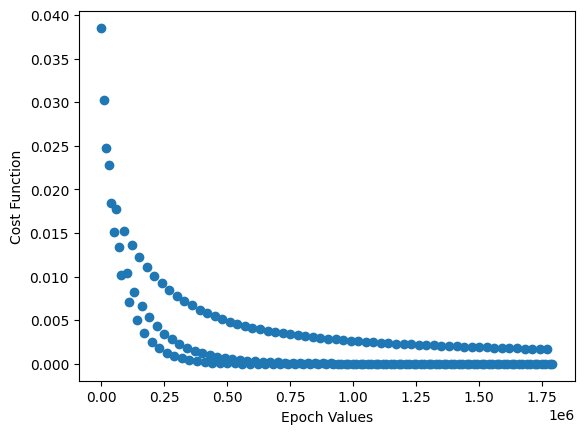

In [ ]:
x1 = []
y1 = []
for i in range(len(cost_list)):
    if(i%(epoch/10) == 0):
        x1.append(i)
        y1.append(cost_list[i])
plt.scatter(x1,y1)
plt.xlabel('Epoch Values')
plt.ylabel('Cost Function')
plt.show()

Importing email Testing Dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/email_test.csv')
xx = list(df['x1']), list(df['x2']),list(df['x3']),list(df['x4']),list(df['x5'])
yy = list(df['class'])
n=df.shape[0]
m=int(n)
print(m)
print(n)
y_test = np.array(yy[:m])
xi = [ xx[0][:m] , xx[1][:m] , xx[2][:m] , xx[3][:m] , xx[4][:m]]
x_test=np.stack((xi[0],xi[1],xi[2],xi[3],xi[4]),axis=1)
y_test

8
8


array([1, 1, 1, 1, 0, 0, 0, 0])

Predicting the output based on training dataset

In [ ]:
y_output = predict(W,B,x_test)
print(y_output)
print('The predicted output = ',output(y_output))
print('The actual output = ',output(y_test))
sum = 0.0
for i in range(len(y_output)):
    if y_output[i] == y_test[i]:
        sum+=1.0
sum = sum/len(y_output)
sum*=100
print("Accuracy score = ",sum,"%")

[1, 1, 1, 1, 1, 1, 1, 1]
The predicted output =  ['spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam']
The actual output =  ['spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham']
Accuracy score =  50.0 %


Preprocessing the input dataset to be used with Scikit/Sklearn

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/gdrive/MyDrive/email.csv')
X = df.drop(columns=['x0','class'])
y = list(df['class'])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=16)
x_test=np.stack((xi[0],xi[1],xi[2],xi[3],xi[4]),axis=1)
y_test = np.array(yy[:m])
x_train

,x1,x2,x3,x4,x5
16,1,0,1,0,1
3,1,0,0,1,0
10,1,0,1,0,1
2,0,1,1,0,0
7,0,0,1,1,0
6,1,1,0,1,1
8,0,1,1,0,0
0,1,1,0,1,1
15,1,0,0,1,0
12,1,1,0,1,1


Predicting the output

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)
logreg.fit(x_train, y_train)
y_pred=(logreg.predict(x_test))
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1])

Printing the predicted output with given testing output on testing dataset

In [ ]:
print('The predicted output = ',output(y_pred))
print('The actual output = ',output(y_test))

The predicted output =  ['spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam']
The actual output =  ['spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham']


Calculating the Accuracy set

In [ ]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,y_pred)
print("Accuracy score= ",score*100,"%")

Accuracy score=  50.0 %


Importing Heart Dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/heart (1).csv')
# for i in range(1000):
#     df=df.sample(frac = 1)
# df.head()
#df.drop(columns=['target'])
print(df.drop(columns=['target']).columns)
len(df.drop(columns=['target']).columns)
#print(np.array((df['age'],df['fbs'])))
n=df.shape[0]
m=int(0.8*n)
print(m)
print(n)
print(len(df.drop(columns=['target']).columns))

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
820
1025
13


Preprocessing the for training set

In [ ]:
xx = list(df['age']),list(df['sex']),list(df['cp']), list(df['trestbps']),list(df['chol']),list(df['fbs']),list(df['restecg']),list(df['thalach']),list(df['exang']),list(df['oldpeak']),list(df['slope']), list(df['ca']), list(df['thal'])
# xx = df.drop(columns=['target'])

yy = list(df['target'])
y_train = np.array(yy[:m])
xi = [ xx[0][:m] , xx[1][:m] , xx[2][:m] , xx[3][:m] , xx[4][:m] , xx[5][:m] , xx[6][:m] , xx[7][:m] , xx[8][:m] , xx[9][:m] , xx[10][:m] , xx[11][:m] , xx[12][:m] ]
x_train=np.stack((xi[0],xi[1],xi[2],xi[3],xi[4],xi[5],xi[6],xi[7],xi[8],xi[9],xi[10],xi[11],xi[12]),axis=1)
xt =[ xx[0][m:] , xx[1][m:] , xx[2][m:] , xx[3][m:] , xx[4][m:] , xx[5][m:] , xx[6][m:] , xx[7][m:] , xx[8][m:] , xx[9][m:] , xx[10][m:] , xx[11][m:] , xx[12][m:] ]
x_test = np.stack((xt[0],xt[1],xt[2],xt[3],xt[4],xt[5],xt[6],xt[7],xt[8],xt[9],xt[10],xt[11],xt[12]),axis=1)
y_test = np.array(yy[m:])

Printing the parameters

In [ ]:
epoch = 100000
n = len(df.drop(columns=['target']).columns)
W, B, cost_list = model(x_train,y_train,0.001,epoch,n)
print('The parameters are ',W,B)
print("The cost function values = ",end = ' ')
print(cost_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cost after  0 iteration is :  0.000896602514549211
cost after  10000 iteration is :  0.00016948786445502247
cost after  20000 iteration is :  0.00014752715825761326
cost after  30000 iteration is :  0.00013938868093660983
cost after  40000 iteration is :  0.00012582476636936266
cost after  50000 iteration is :  0.00010680290794223855
cost after  60000 iteration is :  8.602581244902082e-05
cost after  70000 iteration is :  6.656437107494819e-05
cost after  80000 iteration is :  4.997663077858098e-05
cost after  90000 iteration is :  3.667022129191687e-05
The parameters are  [ 0.27423505 -1.4577233   1.87459764  0.04792082  0.00617198 -0.51928321
  1.70898903  0.19942052 -0.78262151 -0.94850009  0.97832286 -1.60724726
 -1.12164173] -51.06440958627244
The cost function values =  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Plot the Cost Function values with respect to epoch values

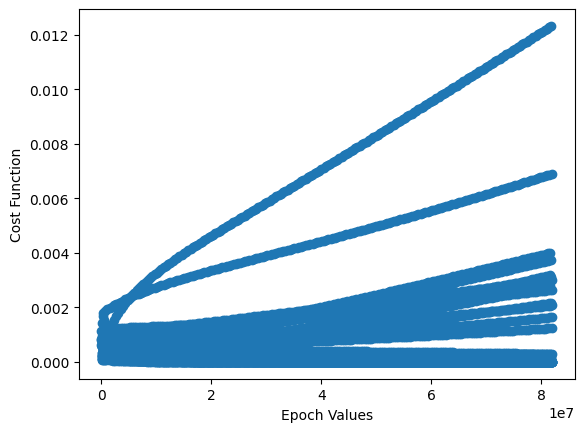

In [ ]:
x1 = []
y1 = []
for i in range(len(cost_list)):
    if(i%(epoch/10) == 0):
        x1.append(i)
        y1.append(cost_list[i])
plt.scatter(x1,y1)
plt.xlabel('Epoch Values')
plt.ylabel('Cost Function')
plt.show()

Classifying whether Heart Disease present or absent

In [ ]:
def output(y):
    x = []
    for i in y:
        if i==1:
            x.append('Heart Disease Present')
        else:
            x.append('Heart Disease Absent')
    return x

Printing the Predicted and Actual Output

In [ ]:
y_output = predict(W,B,x_test)
print(y_output)
print('The predicted output = ',output(y_output))
print('The actual output = ',output(y_test))
sum = 0.0
for i in range(len(y_output)):
    if y_output[i] == y_test[i]:
        sum+=1.0
sum = sum/len(y_output)
sum*=100
print("Accuracy score = ",sum,"%")

[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
The predicted output =  ['Heart Disease Absent', 'Heart Disease Absent', 'Heart Disease Absent', 'Heart Disease Present', 'Heart Disease Absent', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Absent', 'Heart Disease Present', 'Heart Disease Absent', 'Heart Disease Absent', 'Heart Disease Absent', 'Heart Disease Present', 'Heart Disease Absent', 'Heart Disease Abs

Scikit/Sklearn Method

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/gdrive/MyDrive/heart (1).csv')
X = df.drop(columns=['target'])
y = list(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

Fitting the model

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)
y_pred=(logreg.predict(X_test))
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1])

Printing the predicted with actual output

In [ ]:
print('The predicted output = ',output(y_pred))
print('The actual output = ',output(y_test))

The predicted output =  ['Heart Disease Absent', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Absent', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Absent', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Absent', 'Heart Disease Absent', 'Heart Disease Present', 'Heart Disease Absent', 'Heart Disease Absent', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Absent', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Absent', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Present', 'Heart Disease Absent', 'Heart Disease Present', 'Heart Dis

Printing the Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,y_pred)
print("Accuracy score= ",score*100,"%")

Accuracy score=  83.90243902439025 %
